In [1]:
# Convolutional Neural Network
 
# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html
 
# Installing Keras
# pip install --upgrade keras

ALL_IMAGES_PATH = 'C:/Users/madad/Documents/pets/petfinder-adoption-prediction/train_resized/'
RESIZED_IMAGES_PATH_TRAIN = 'C:/Users/madad/Documents/pets/petfinder-adoption-prediction/train_resized_classif/'
RESIZED_IMAGES_PATH_TEST = 'C:/Users/madad/Documents/pets/petfinder-adoption-prediction/test_resized_classif/'
CSV_PATH = 'C:/Users/madad/Documents/pets/petfinder-adoption-prediction/train/train.csv'

In [1]:
# Part 1 - Building the Models


# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Input, Conv2D, Flatten, BatchNormalization, Reshape, UpSampling2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import cifar10
from keras.optimizers import Adam, RMSprop
from keras import initializers
import keras

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

NUM_LABELS = 5
IMG_SIZE = 64

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Convolution2D(20, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Convolution2D(20, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = NUM_LABELS, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())


Using TensorFlow backend.
c:\eprog\python3.6\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
c:\eprog\python3.6\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
c:\eprog\python3.6\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 20)        560       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               501888    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

c:\eprog\python3.6\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=5)`


In [4]:
import pandas as pd

CSV_PATH = 'C:/Users/madad/Documents/pets/petfinder-adoption-prediction/train/train.csv'

# Read CSV Values

# initialize the list of column names in the CSV file and then
# load it using Pandas
cols = ["Type", "Name", "Age", "Breed1", "Breed2", "Gender", "Color1", "Color2", "Color3", "MaturitySize", "FurLength", "Vaccinated", "Dewormed", "Sterilized", "Health", "Quantity", "Fee", "State", "RescuerID", "VideoAmt", "Description", "PetID", "PhotoAmt", "AdoptionSpeed"]
df = pd.read_csv(CSV_PATH, header=0, usecols=['PhotoAmt', 'PetID', 'AdoptionSpeed'], names=cols)

,PetID,PhotoAmt,AdoptionSpeed
0,86e1089a3,1.0,2
1,6296e909a,2.0,0
2,3422e4906,7.0,3
3,5842f1ff5,8.0,2
4,850a43f90,3.0,2


In [6]:
new_df = pd.DataFrame() 

for index, row in df.iterrows():

    quantity = int(row['PhotoAmt'])

    petId = str(row['PetID'])

    for i in range(1, quantity+1):
            
        new_row = row
        new_row['PetID'] = petId + '-' + str(i)

        new_df = new_df.append([new_row],ignore_index=True)
        
new_df.head()

,PetID,PhotoAmt,AdoptionSpeed
0,86e1089a3-1,1.0,2
1,6296e909a-1,2.0,0
2,6296e909a-2,2.0,0
3,3422e4906-1,7.0,3
4,3422e4906-2,7.0,3


In [ ]:
# Run this only if images are not resized
#load_resize_pet_images(df, IMAGES_PATH, RESIZED_IMAGES_PATH)

In [9]:
import numpy as np

# initialize images array
images = []

# loop over the csv rows
for index, row in new_df.iterrows():

    img_path = ALL_IMAGES_PATH + row['PetID'] + '.jpg'

    image = Image.open(img_path).convert('RGB')

    # add the image to the set of images the network will be trained on
    images.append(np.asarray(image))   
    
img_array = np.asarray(images)    

In [10]:
import glob

# split 90% training, 10% test
# The percent of data that will be included in the test set
TRAIN_TEST_SPLIT = 0.1

num_data_files = len(img_array)

nr_test_data = int(num_data_files * TRAIN_TEST_SPLIT)

train_images = img_array[nr_test_data:]
test_images = img_array[:nr_test_data]

train_labels = new_df['AdoptionSpeed'][nr_test_data:].values
test_labels = new_df['AdoptionSpeed'][:nr_test_data].values

assert len(train_images) + len(test_images) == num_data_files
assert len(train_labels) + len(test_labels) == num_data_files

In [7]:
from PIL import Image

def write_image_categories(path, images, labels):
    for i in range(len(images)): 
        image = Image.fromarray(images[i])
        image.save(path + '{}/{}.jpg'.format(labels[i], i))

In [14]:
write_image_categories(RESIZED_IMAGES_PATH_TRAIN, train_images, train_labels)
write_image_categories(RESIZED_IMAGES_PATH_TEST, test_images, test_labels)

--Return--
> <ipython-input-14-d70e602aa4b1>(1)<module>()->None
-> import pdb; pdb.set_trace()
(Pdb) c


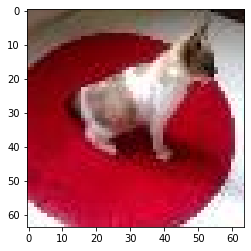

In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

index = 99

plt.imshow(images[index], interpolation='nearest')
plt.show()

In [17]:
print("[INFO] training model...")
BATCH_SIZE = 32 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(RESIZED_IMAGES_PATH_TRAIN,
                                                 target_size = (64, 64),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(RESIZED_IMAGES_PATH_TEST,
                                            target_size = (64, 64),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')


[INFO] training model...
Found 52480 images belonging to 5 classes.
Found 5831 images belonging to 5 classes.


In [20]:
history = model.fit_generator(training_set,
                         samples_per_epoch = 10000,
                         nb_epoch = 15,
                         validation_data = test_set,
                         nb_val_samples = 1000)


c:\eprog\python3.6\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
c:\eprog\python3.6\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=312, epochs=15, validation_steps=1000)`
  """


Epoch 1/15
312/312 [==============================] - 46s 148ms/step - loss: 0.4710 - accuracy: 0.7986 - val_loss: 0.4626 - val_accuracy: 0.8000
Epoch 2/15
312/312 [==============================] - 45s 145ms/step - loss: 0.4672 - accuracy: 0.8000 - val_loss: 0.4425 - val_accuracy: 0.8000
Epoch 3/15
312/312 [==============================] - 45s 143ms/step - loss: 0.4646 - accuracy: 0.8000 - val_loss: 0.4602 - val_accuracy: 0.8000
Epoch 4/15
312/312 [==============================] - 43s 139ms/step - loss: 0.4646 - accuracy: 0.8000 - val_loss: 0.4508 - val_accuracy: 0.8000
Epoch 5/15
312/312 [==============================] - 44s 140ms/step - loss: 0.4642 - accuracy: 0.8000 - val_loss: 0.4634 - val_accuracy: 0.8000
Epoch 6/15
312/312 [==============================] - 44s 140ms/step - loss: 0.4638 - accuracy: 0.8000 - val_loss: 0.4378 - val_accuracy: 0.7999
Epoch 7/15
312/312 [==============================] - 43s 138ms/step - loss: 0.4644 - accuracy: 0.8000 - val_loss: 0.4731 - val_ac

KeyError: 'acc'

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


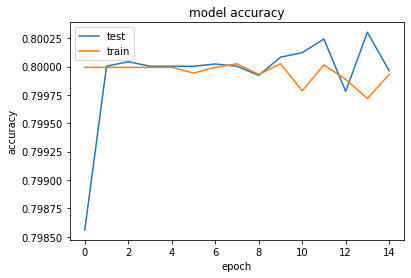

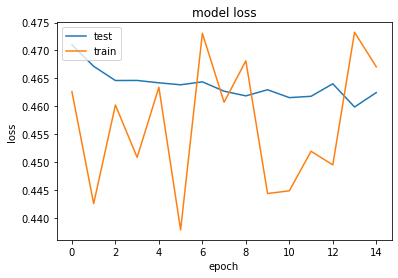

In [23]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [24]:
def save_model_to_disk(model):
    # serialize model to JSON
    model_json = model.to_json()
    with open(model_name + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_name + ".h5")
    print("Saved model to disk")

In [25]:
BATCH_SIZE = 32
EPOCHS = 15
IMG_SIZE = 64

model_name = "pets_classification{}pixels_{}epochs".format(IMG_SIZE, EPOCHS)

save_model_to_disk(model)

Saved model to disk
